# Veriyi Tanımak

### Veri Setinin Hikayesi Ve Yapısının İncelenmesi

In [3]:
import pandas as pd
import seaborn as sns
planets=sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


## Verinin Hikayesi Nedir?
#### -Verinin Nasıl Ve Ne Koşulda Kaydediliğinin Bilinmesi Önemlidir

#### Yapılan Çalışmaları Yedek Bir Df Üzerinde Yapmak Faydalıdır

In [12]:
df=planets.copy()


In [23]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [25]:
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


### Veri Setinin Yapısal Bilgileri

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [32]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [36]:
df.method=pd.Categorical(df.method)

In [38]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

### Verinin Betimlenmesi

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


### Eksik Değer İşlemleri

In [20]:
import pandas as pd
import seaborn as sns
planets=sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [22]:
df=planets.copy()

In [27]:
#Herhangi Bir Eksik Gözlem Var Mı?
df.isnull().values.any()

True

In [29]:
#Hangi Değişkende Kaç Tane Eksik Değer Var?
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [78]:
df["orbital_period"].fillna(0,inplace=True)
df.isnull().sum()

C:\Users\pc\AppData\Local\Temp\ipykernel_12172\897219468.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["orbital_period"].fillna(0,inplace=True)


method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [17]:
df["mass"].fillna(df.mass.mean(),inplace=True)
df.isnull().sum()

method              0
number              0
orbital_period     43
mass                0
distance          227
year                0
dtype: int64

### Kategorik Değişken Özetleri

In [42]:
df_kategorik=df.select_dtypes(include="object")
df_kategorik

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity
...,...
1030,Transit
1031,Transit
1032,Transit
1033,Transit


In [44]:
df_kategorik.method.unique()#Değişkenin Sınıflarını Bulma

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [52]:
df_kategorik['method'].value_counts().count()
#Değişkenin Sınıf Sayısını Bulma

10

<Axes: ylabel='method'>

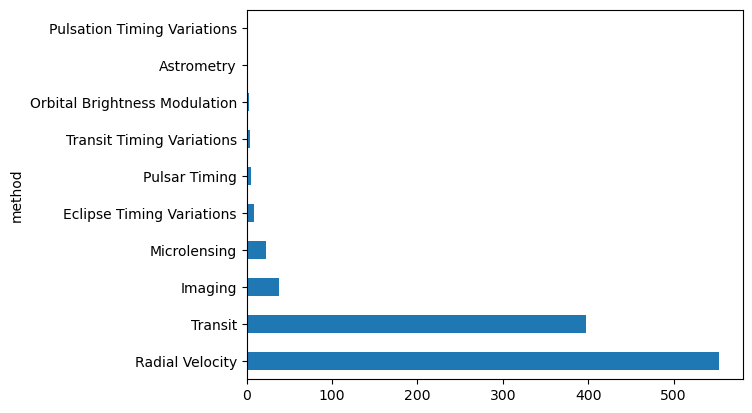

In [54]:
df_kategorik['method'].value_counts().plot.barh()

### Sürekli(Sayısal)Değişkenlerin Özetleri

In [62]:
df_sayi=df.select_dtypes(include=["float64","int64"])
df_sayi.head(6) #Sadece Sayılsal Değerler Kaldı

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009
5,1,185.840,4.80,76.39,2008


In [66]:
df_sayi.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [72]:
df_sayi["mass"].describe().T

count    513.000000
mean       2.638161
std        3.818617
min        0.003600
25%        0.229000
50%        1.260000
75%        3.040000
max       25.000000
Name: mass, dtype: float64

## Dağılım Grafikleri

**Veri Seti Hikayesi**

price: dolar cinsinde fiyat ($326–$18,823)

carat: ağırlık (0.2–5.01)

cut: kalite (Fair, Good, Very Good, Premium, Ideal)

color: renk (from J (worst) to D (best))

clarity: temizliği, berraklığı (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0–10.74)

y: width in mm (0–58.9)

z: depth in mm (0–31.8)

depth: toplam derinlik yüzdesi = z / mean(x, y) = 2 * z / (x + y) (43–79)

table: elmasın en geniş noktasına göre genişliği (43–95)

### **Barplot**

In [104]:
import seaborn as sns
df=sns.load_dataset("diamonds")
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [119]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [137]:
df[(df.cut=="Fair")&(df.price>=9500)].count()

carat      157
cut        157
color      157
clarity    157
depth      157
table      157
price      157
x          157
y          157
z          157
dtype: int64

In [139]:
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [147]:
df.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


In [ ]:
#Ordinal (Seviyeli) Sıralama

In [149]:
from pandas.api.types import CategoricalDtype

In [151]:
df.cut.astype(CategoricalDtype(ordered=True))

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [153]:
#Sıralamayı Tanımlamadığımız İçin Random Olarak Sıralandı
#Bu Yanlış Bi Uygulama

In [163]:
df_c=["Fair", "Good", "Very", "Premium", "Ideal"]

In [165]:
df.cut.astype(CategoricalDtype(categories=df_c,ordered=True))

0          Ideal
1        Premium
2           Good
3        Premium
4           Good
          ...   
53935      Ideal
53936       Good
53937        NaN
53938    Premium
53939      Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very' < 'Premium' < 'Ideal']

### Sütun Grafiğinin Oluşturulması

In [33]:
df=sns.load_dataset("diamonds")


In [35]:
#barplot

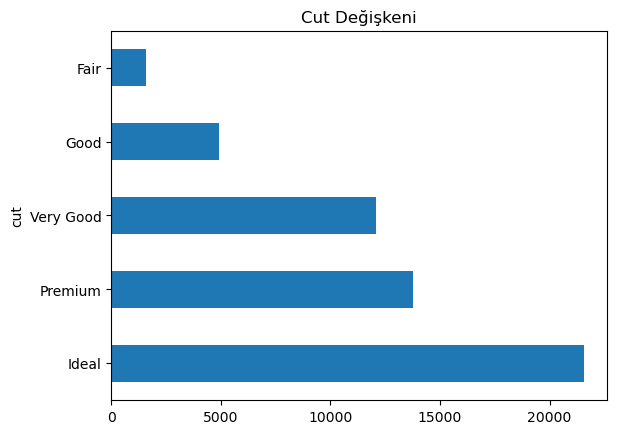

In [37]:
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeni");

<Axes: xlabel='cut', ylabel='None'>

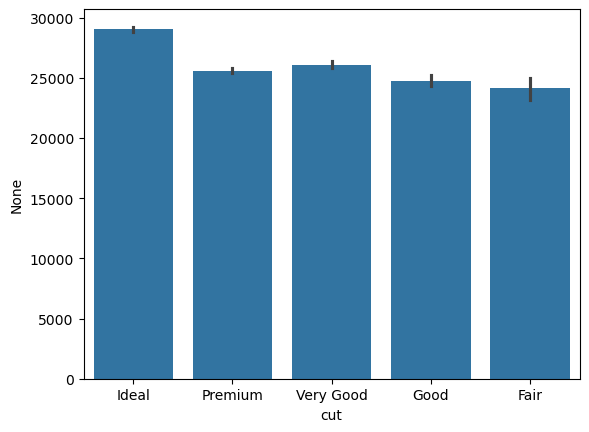

In [62]:
sns.barplot(x="cut",y=df.cut.index,data=df)

### Çapraz Sütun Grafiği

In [5]:
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


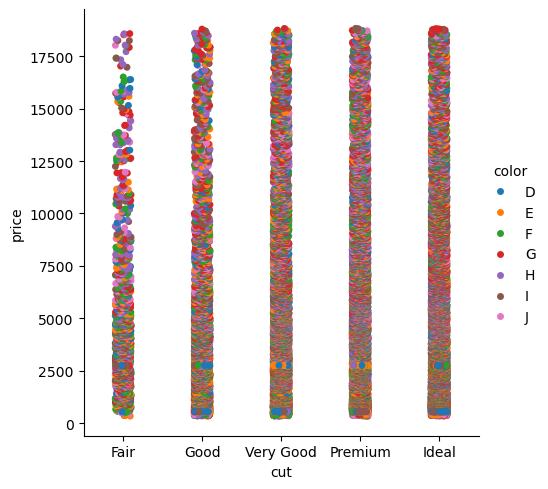

In [90]:
sns.catplot(x="cut",y="price",data=df,hue="color")

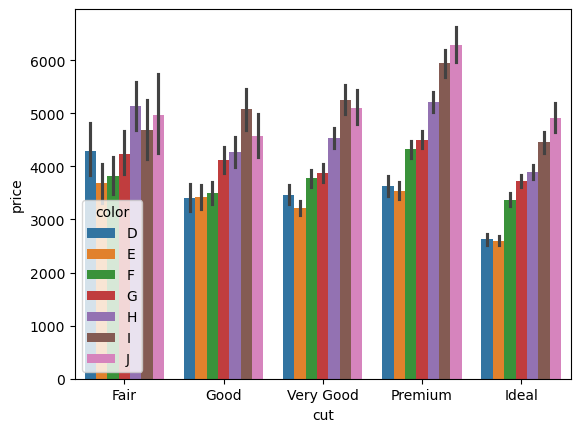

In [52]:
sns.barplot(x="cut",y="price",data=df,hue="color");

In [62]:
df.groupby(["cut","color"])["price"].mean()

C:\Users\pc\AppData\Local\Temp\ipykernel_14548\1250844969.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["cut","color"])["price"].mean()


cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

### Histogram Ve Yoğunluk Grafiği

In [67]:
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


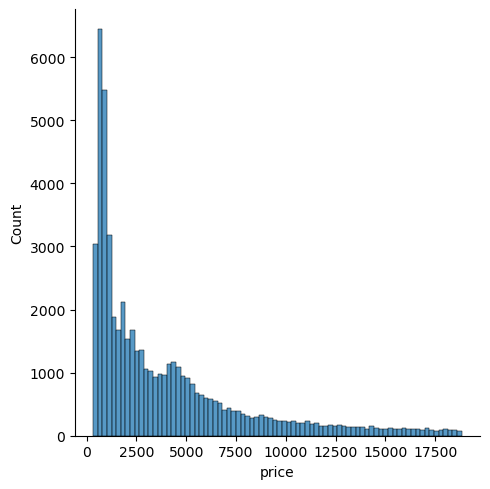

In [77]:
sns.displot(df.price);

In [69]:
?sns.displot

Signature:
sns.displot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    row=None,
    col=None,
    weights=None,
    kind='hist',
    rug=False,
    rug_kws=None,
    log_scale=None,
    legend=True,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    col_wrap=None,
    row_order=None,
    col_order=None,
    height=5,
    aspect=1,
    facet_kws=None,
    **kwargs,
)
Docstring:
Figure-level interface for drawing distribution plots onto a FacetGrid.

This function provides access to several approaches for visualizing the
univariate or bivariate distribution of data, including subsets of data
defined by semantic mapping and faceting across multiple subplots. The
``kind`` parameter selects the approach to use:

- :func:`histplot` (with ``kind="hist"``; the default)
- :func:`kdeplot` (with ``kind="kde"``)
- :func:`ecdfplot` (with ``kind="ecdf"``; univariate-only)

Additionally, a :func:`rugplot` can be added to any kind of plot to show
individual 

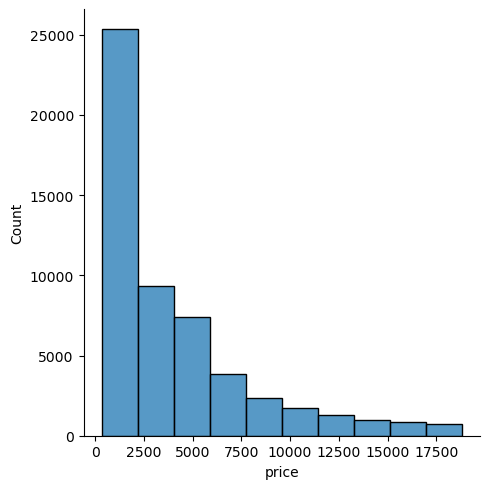

In [79]:
sns.displot(df.price,bins=10);#Histogram Grafiği

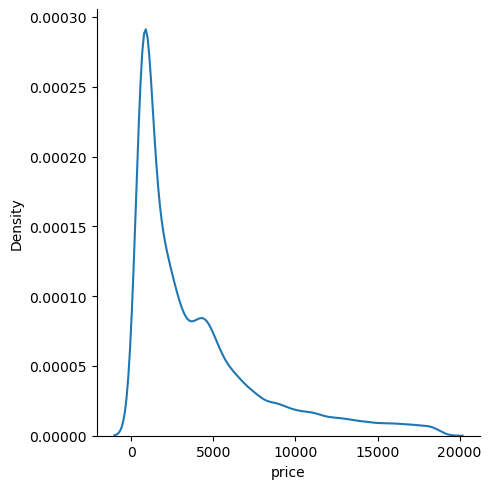

In [99]:
sns.displot(df.price,kind="kde");#Yoğunluk Grafiği

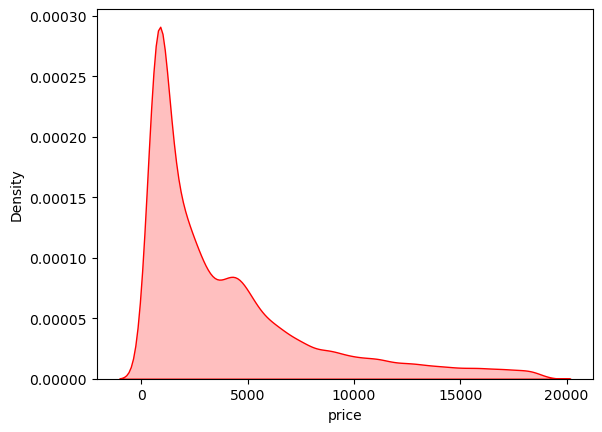

In [113]:
sns.kdeplot(df.price,color="red",fill=True);

In [107]:
?sns.kdeplot

Signature:
sns.kdeplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    weights=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    fill=None,
    multiple='layer',
    common_norm=True,
    common_grid=False,
    cumulative=False,
    bw_method='scott',
    bw_adjust=1,
    warn_singular=True,
    log_scale=None,
    levels=10,
    thresh=0.05,
    gridsize=200,
    cut=3,
    clip=None,
    legend=True,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot univariate or bivariate distributions using kernel density estimation.

A kernel density estimate (KDE) plot is a method for visualizing the
distribution of observations in a dataset, analogous to a histogram. KDE
represents the data using a continuous probability density curve in one or
more dimensions.

The approach is explained further in the :ref:`user guide <tutorial_kde>`.

Relative to a histogram, KDE can produce a plot that is less cl

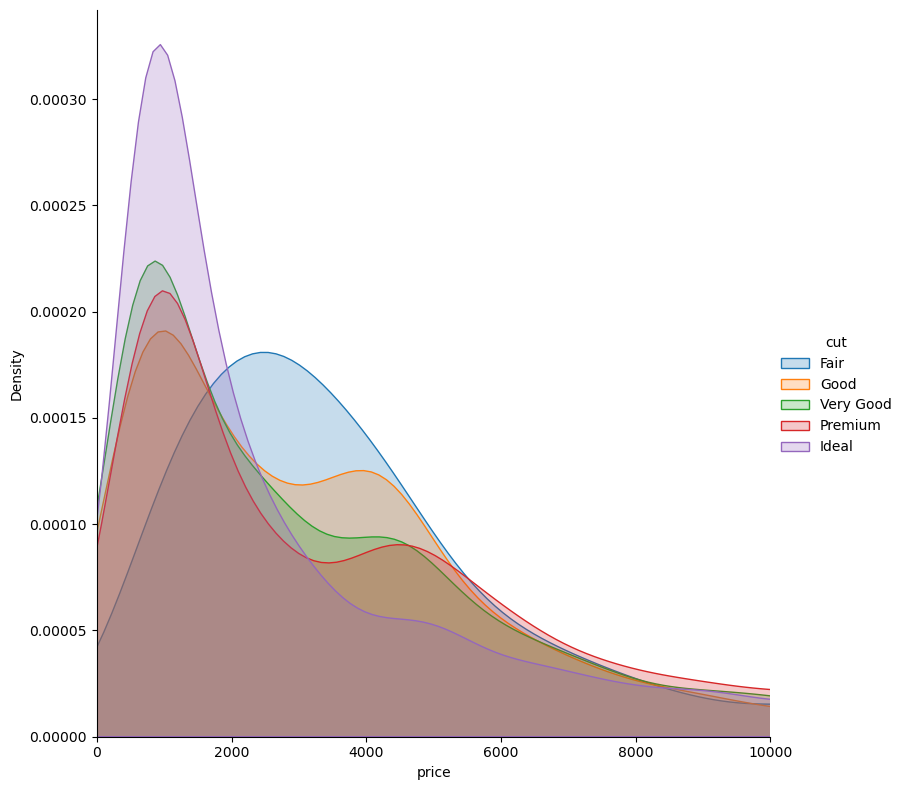

In [139]:
sns.FacetGrid(df,hue="cut",
              xlim=(0,10000),
              height=8
              ).map(sns.kdeplot,"price",fill=True).add_legend();

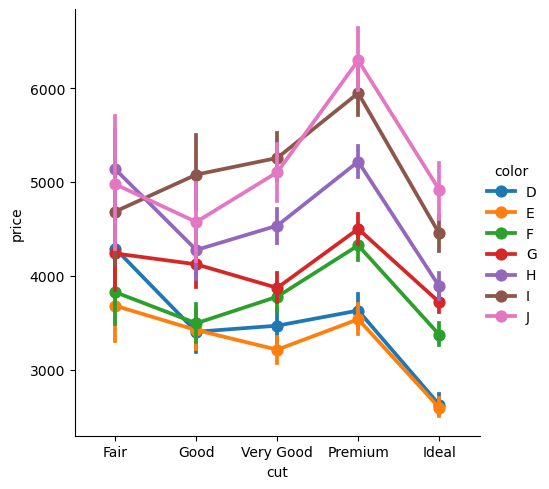

In [147]:
sns.catplot(df,x="cut",y="price",kind="point",hue="color")

In [141]:
?sns.catplot

Signature:
sns.catplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    row=None,
    col=None,
    kind='strip',
    estimator='mean',
    errorbar=('ci', 95),
    n_boot=1000,
    seed=None,
    units=None,
    weights=None,
    order=None,
    hue_order=None,
    row_order=None,
    col_order=None,
    col_wrap=None,
    height=5,
    aspect=1,
    log_scale=None,
    native_scale=False,
    formatter=None,
    orient=None,
    color=None,
    palette=None,
    hue_norm=None,
    legend='auto',
    legend_out=True,
    sharex=True,
    sharey=True,
    margin_titles=False,
    facet_kws=None,
    ci=<deprecated>,
    **kwargs,
)
Docstring:
Figure-level interface for drawing categorical plots onto a FacetGrid.

This function provides access to several axes-level functions that
show the relationship between a numerical and one or more categorical
variables using one of several visual representations. The `kind`
parameter selects the underlying axes-level function to us

### Örnek Veri Seti

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [154]:
df=sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [202]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


NotImplementedError: Bivariate ECDF plots are not implemented

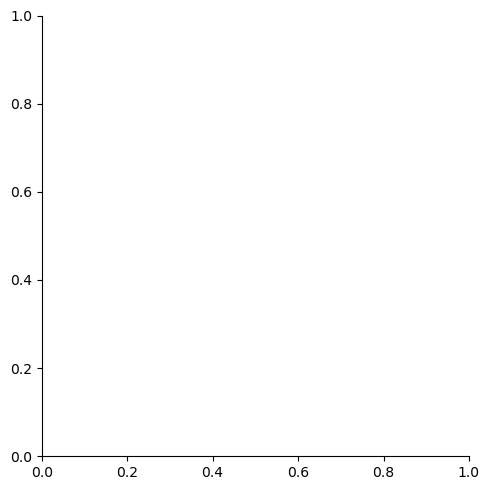

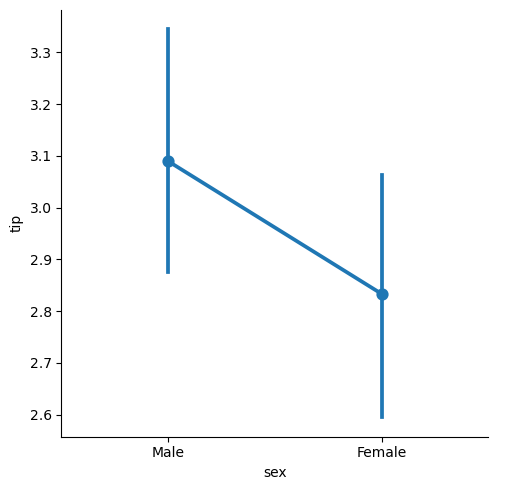

In [256]:
sns.catplot(df,x="sex",y="tip",kind="point")

<Axes: xlabel='time', ylabel='tip'>

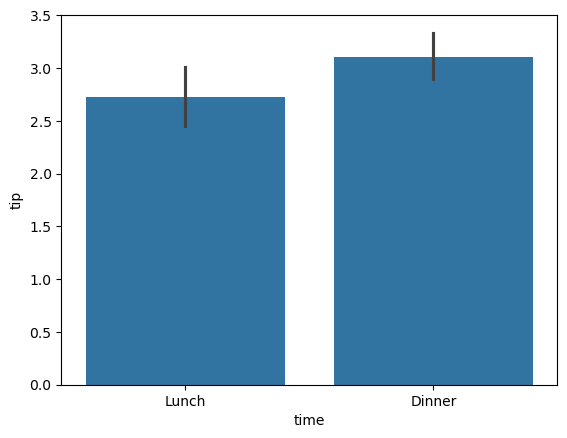

In [252]:
sns.barplot(df,x="time",y="tip")

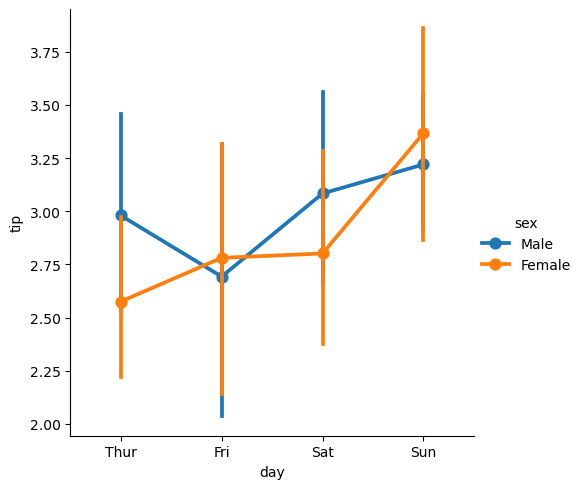

In [266]:
sns.catplot(df,x="day",y="tip",hue="sex",kind="point")

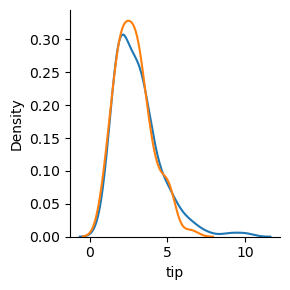

In [278]:
sns.FacetGrid(df,hue="sex").map(sns.kdeplot,"tip")

In [268]:
?sns.FacetGrid

Init signature:
sns.FacetGrid(
    data,
    *,
    row=None,
    col=None,
    hue=None,
    col_wrap=None,
    sharex=True,
    sharey=True,
    height=3,
    aspect=1,
    palette=None,
    row_order=None,
    col_order=None,
    hue_order=None,
    hue_kws=None,
    dropna=False,
    legend_out=True,
    despine=True,
    margin_titles=False,
    xlim=None,
    ylim=None,
    subplot_kws=None,
    gridspec_kws=None,
)
Docstring:      Multi-plot grid for plotting conditional relationships.
Init docstring:
Initialize the matplotlib figure and FacetGrid object.

This class maps a dataset onto multiple axes arrayed in a grid of rows
and columns that correspond to *levels* of variables in the dataset.
The plots it produces are often called "lattice", "trellis", or
"small-multiple" graphics.

It can also represent levels of a third variable with the ``hue``
parameter, which plots different subsets of data in different colors.
This uses color to resolve elements on a third dimension, but 